# DataCon 2023. Visualization
Для того чтобы выбрать подходящую модель предсказания, нужно представлять себе форму данных. Простое просматривание статистических показателей среднего, отклонения, медианы и так далее не может рассказать всего. Хочется посмотреть на графики.

А когда работа готова, то всегда требуется показать на графиках некоторые результаты.

Именно поэтому важно уметь строить графики по данным и анализировать по ним саму выборку и придумывать гипотезы.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Часть 1. AqSolDB: отобранный набор данных о растворимости в воде
База данных AqSolDB, созданная исследовательской группой Autonomous Energy Materials Discovery [AMD], состоит из значений растворимости в воде 9 982 уникальных соединений, отобранных из 9 различных общедоступных наборов данных о растворимости в воде. Этот общедоступный набор данных, который является крупнейшим в своем роде, будет служить не только полезным справочным источником измеренных данных о растворимости, но и значительно улучшенным и обобщаемым источником обучающих данных для построения моделей, управляемых данными.

Содержание
В дополнение к заданным экспериментальным значениям растворимости, AqSolDB также содержит некоторые соответствующие топологические и физико-химические 2D-дескрипторы, рассчитанные с помощью RDKit. Кроме того, AqSolDB содержит подтвержденные молекулярные представления каждого из соединений.

In [ ]:
#Чтение данных
df = pd.read_csv('curated-solubility-dataset.csv')
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


**Описание таблицы:**

*ID* - ID молекулы          
*Name* - название молекулы           
*InChI* - основанный на структуре химический идентификатор
*InChIKey* -  международный текстовый химический идентификатор
*SMILES* -   идентификатор, основанный на системе правил однозначного описания состава и структуры молекулы химического вещества с использованием строки символов          
*Solubility* - растворимость в воде                  
*Ocurrences* - появления соединений (нужны были для создания базы)       
*Group* - группа соединений в классификации создателей базы данных               
*MolWt* - молярная масса
*MolLogP* - Wildman-Crippen LogP value  (LogP - показатель растворимости соедения в воде или в другом растворителе)  
*MolMR* - Wildman-Crippen MR value       
*HeavyAtomCount* - количество тяжелых атомов       
*NumHAcceptors* - количество акцепторов водородных связей
*NumHDonors* - количество доноров водородных связей        
*NumHeteroatoms* - количество гетероатомов      
*NumRotatableBonds* - количество вращающихся связей  
*NumValenceElectrons* - количество валентных электронов  
*NumAromaticRings* - количество ароматических колец   
*NumSaturatedRings* - количество насыщенных колец  
*NumAliphaticRings* - количество алифатических колец    
*RingCount* - количество колец          
*TPSA* - топологическая площадь полярной поверхности               
*LabuteASA* - площадь поверхности           
*BalabanJ* - Balaban’s J index           
*BertzCT* -  топологический индекс, предназначенный для количественной оценки “сложности” молекул.           

In [ ]:
#Информация по таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [ ]:
#Описание численных признаков
df.describe()

,Solubility,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,-2.889909,0.067449,1.378081,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,467.336782
std,2.368154,0.234702,1.023476,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,546.631696
min,-13.171900,0.000000,1.000000,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000
25%,-4.326325,0.000000,1.000000,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,163.243343
50%,-2.618173,0.000000,1.000000,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,351.640433
75%,-1.209735,0.000000,1.000000,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848
max,2.137682,3.870145,38.000000,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708


In [ ]:
#Для построения графиков используем цветовую палитру
colors = sns.color_palette('pastel', 5)

## Часть 2. Matplotlib
![image.png](attachment:image.png)

В Python основной библиотекой для рисваония графиков является [Matplotlib](https://matplotlib.org/). Другие библиотеки с очень большой вероятностью внутри основываются на ней.

### 2.1. Создание графика
Для начала нужно инициализоровать график и задать его размеры с помощью команды figsize

 - **fig** (сокращение от "figure") представляет собой объект класса Figure, который является контейнером для одного или нескольких графических объектов (осей, рисунков, текста и т.д.). Он представляет собой область рисования, на которой создаются графики

 - **ax** (сокращение от "axes") является объектом класса Axes, который представляет собой систему координат, на которой отображаются данные графика. Он содержит методы для создания различных графических элементов, таких как точки, линии, гистограммы и т.д


In [ ]:
colors

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]

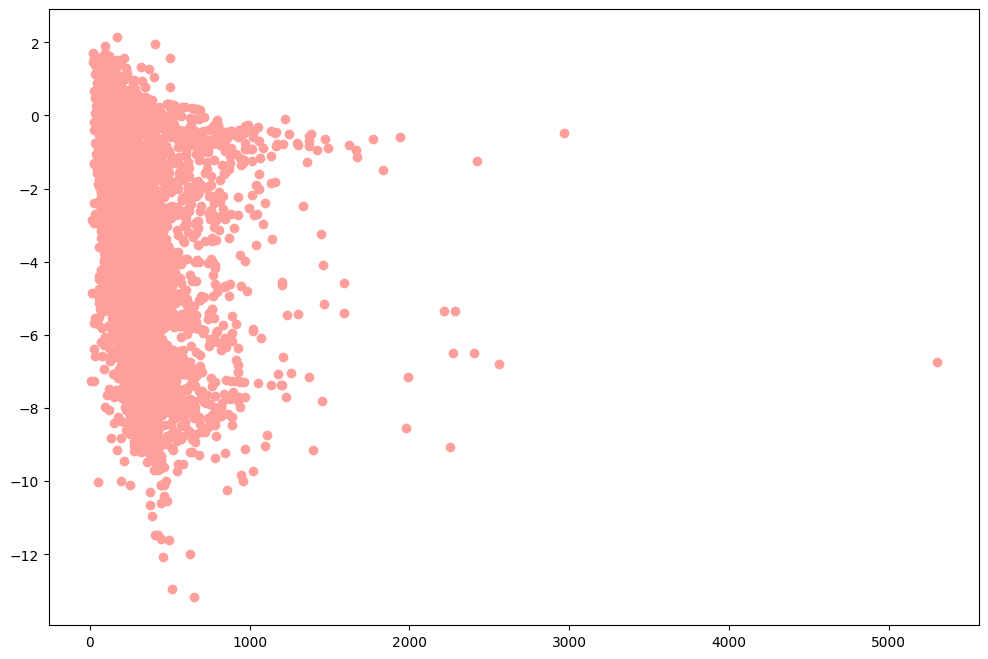

In [ ]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.scatter(df['MolWt'], df['Solubility'], color = colors[3])
plt.show() #Вывод графика

### 2.2. Детали графика
#### 2.2.1. Подписи осей и заголовок графика
Подписать оси можно с помощью комманд `set_xlabel()` и `set_уlabel()`, дать заголовок графику с помощью команды `set_title()`, кроме того, можно изменять размер подписи с помощью `fontsize`

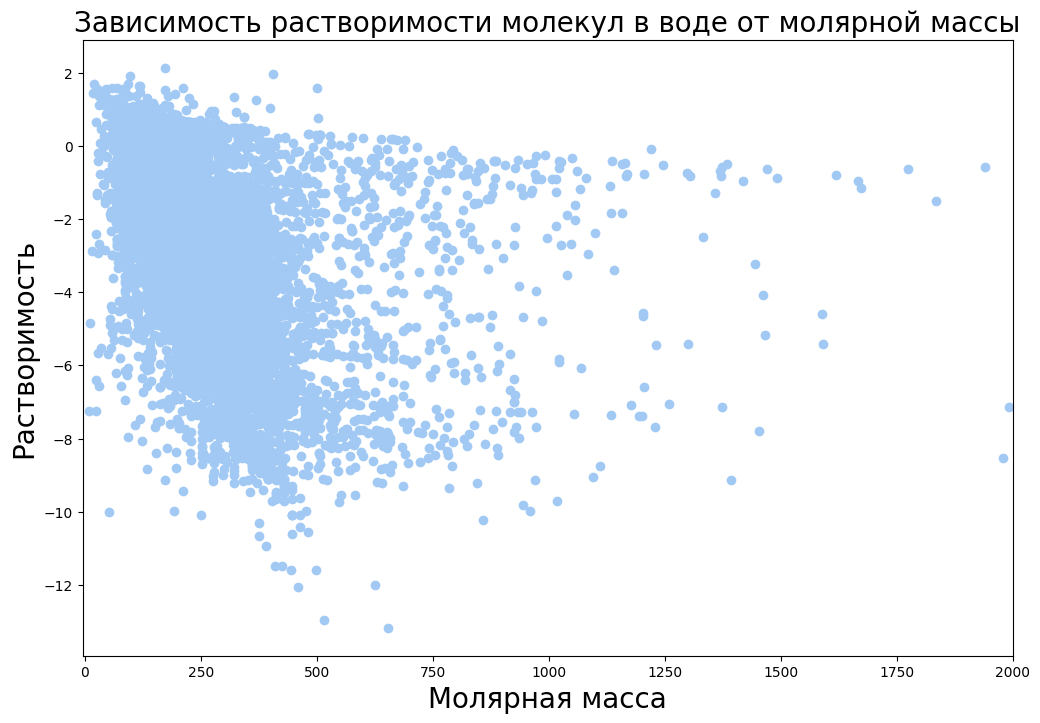

In [ ]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.scatter(df['MolWt'], df['Solubility'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость растворимости молекул в воде от молярной массы', fontsize = 20) # Создание заголовка
ax.set_xlabel('Молярная масса', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Растворимость', fontsize = 20) # Создание подписи оси y
plt.xlim(-5, 2000) #Промежутки х и у
plt.show() #Вывод графика

### 2.2.2. Изменение осей
Для редактирования горизонтальной оси в модуле `plt` есть метод `ax.set_xticks()`, который принимает список меток, которые должны быть нанесены на горизонтальную ось.  


*   создадим переменную **x_range**, вызовем функцию `range`,
*   передадим в нее минимальный индекс серии, максимальный индекс серии (не забудем прибавить 1, чтобы максимальный индекс тоже вошел в `range`),
*   укажим интервал, равный 300;
*   приведем результат к типу `list` и посмотрим на полученный список.

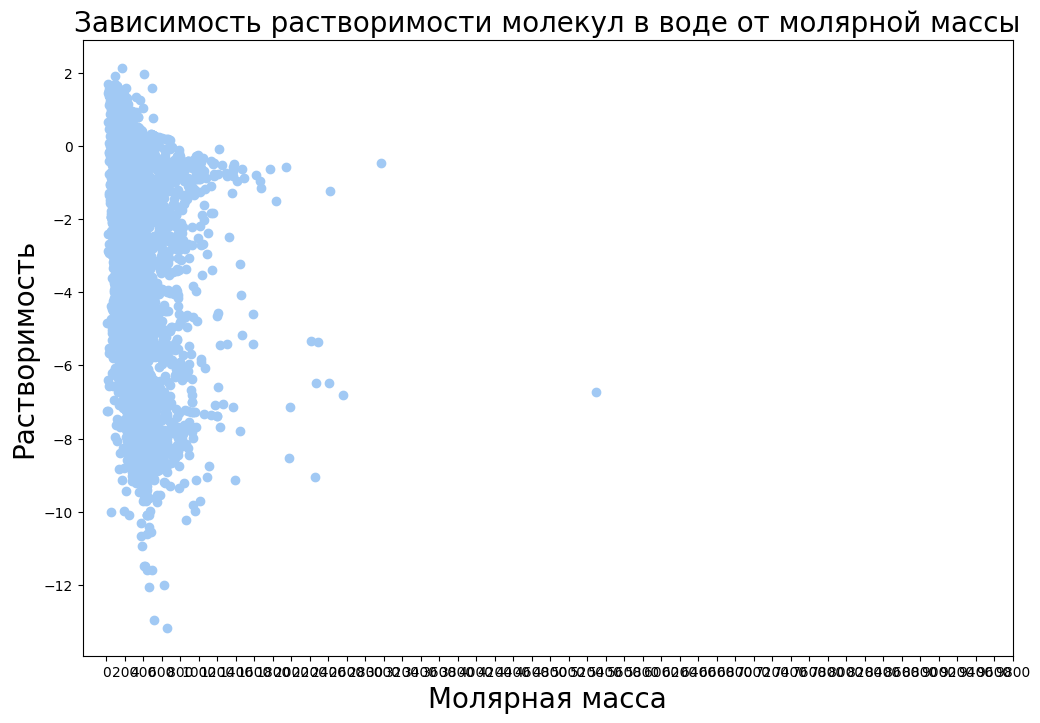

In [ ]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.scatter(df['MolWt'], df['Solubility'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость растворимости молекул в воде от молярной массы', fontsize = 20) # Создание заголовка
ax.set_xlabel('Молярная масса', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Растворимость', fontsize = 20) # Создание подписи оси y
#Зададим список новых
x_range = list(range(df['MolWt'].index.min(), df['MolWt'].index.max()+1, 200))
ax.set_xticks(x_range) # Создание подписи оси х
plt.show() #Вывод графика

Достаточно часто возникает ситуация, когда метки нужно немного повернуть, чтобы повысить читаемость графика, например, когда меток много, и они перекрывают друг друга.

Для этого в функции `ax.tick_params()` укажем угол поворота с помощью `rotation`.  Повернем метки на 45 градусов против часовой стрелки.

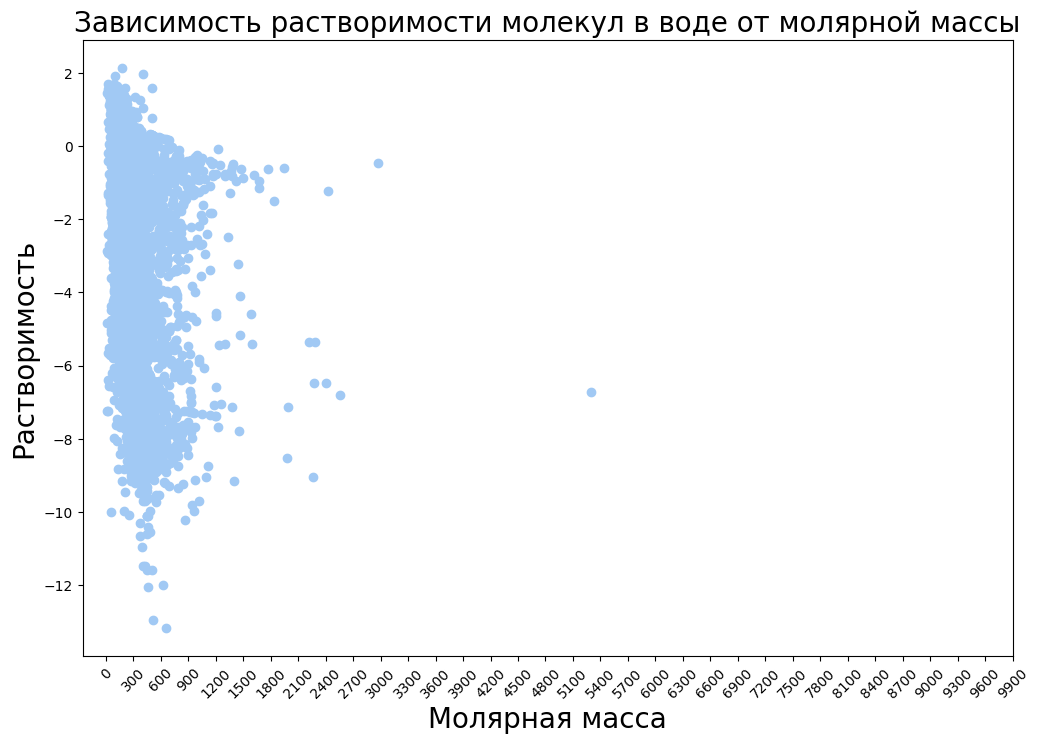

In [ ]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.scatter(df['MolWt'], df['Solubility'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость растворимости молекул в воде от молярной массы', fontsize = 20) # Создание заголовка
ax.set_xlabel('Молярная масса', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Растворимость', fontsize = 20) # Создание подписи оси y

#Зададим список новых
x_range = list(range(df['MolWt'].index.min(), df['MolWt'].index.max()+1, 300))
ax.set_xticks(x_range) # Создание подписи оси х
ax.tick_params(axis='x', rotation=45) #Поворот меток
plt.show() #Вывод графика

#### 2.2.3. Легенда
Иногда приходиться на одном графике строить несколько зависимостей, в этом случае бывает полезна легенда, которую  можно создать с помощью команды `plt.legend()`, предварительно указав `label` во время создания графика

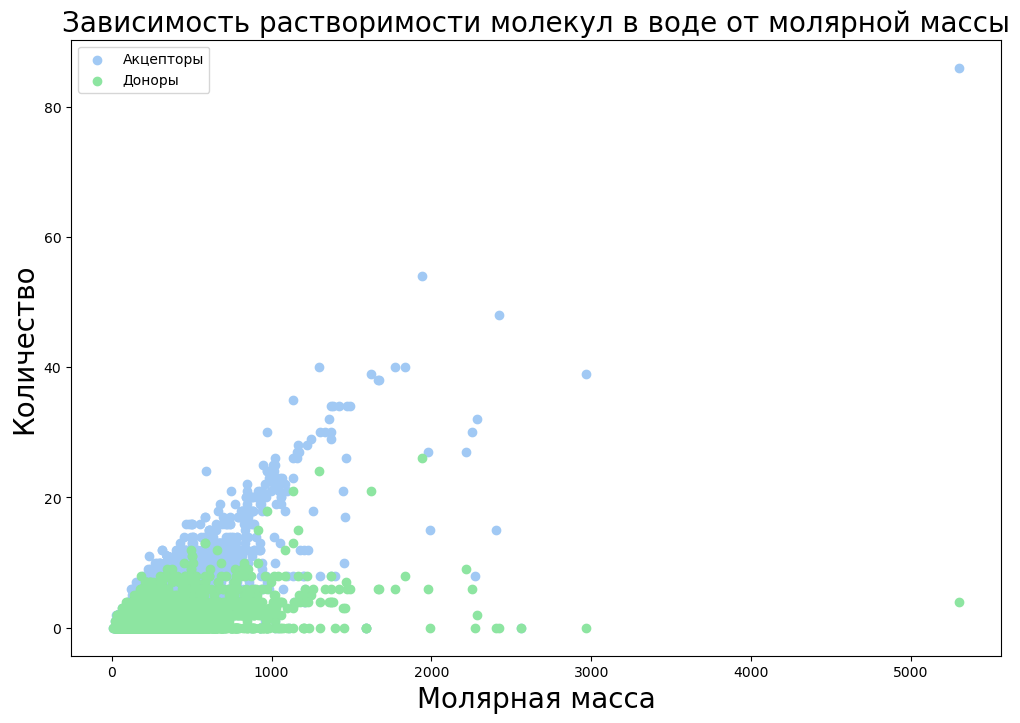

In [ ]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Создадим два разных графика в одних осях
ax.scatter(df['MolWt'], df['NumHAcceptors'], label = 'Акцепторы', color = colors[0])
ax.scatter(df['MolWt'], df['NumHDonors'], label = 'Доноры', color = colors[2])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость растворимости молекул в воде от молярной массы', fontsize = 20) # Создание заголовка
ax.set_xlabel('Молярная масса', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Количество', fontsize = 20) # Создание подписи оси y
ax.legend()
plt.show() #Вывод графика

### 2.3. Различные виды графиков
#### 2.3.1. Гистограмма:
Помимо линейного `ax.plot()` есть еще один часто используемый вид графиков для визуализации численных данных – это **гистограмма**. Гистограмма показывает распределение данных.

*Гистограмма строится следующим образом:*

*   Сначала какой-либо отсортированный массив данных делится на несколько интервалов, обычно одинаковой ширины.
*   Затем для каждого интервала определяется, сколько элементов массива входит в этот интервал.
*   И в конце количество элементов массива в каждом интервале отображается на графике в виде высоты соответствующего столбика.

Построим гистограмму распределения для растворимости с помощью `ax.hist()`

`bins` позволяет изменять количество интервалов



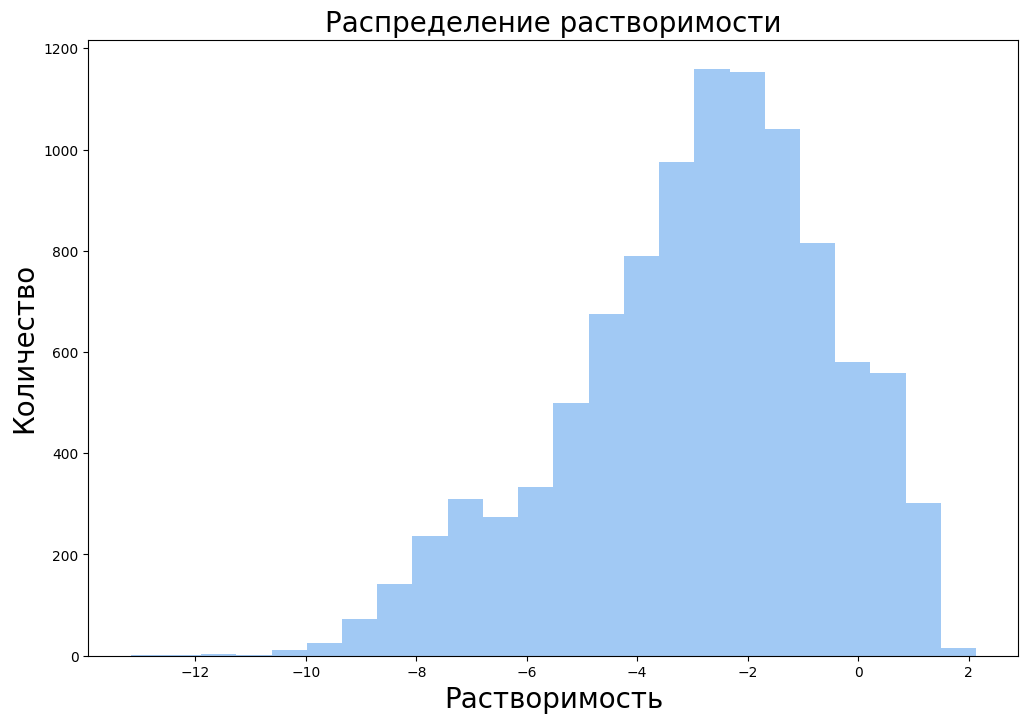

In [ ]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Создадим два разных графика в одних осях
ax.hist(df['Solubility'], bins = 24, color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Распределение растворимости', fontsize = 20) # Создание заголовка
ax.set_xlabel('Растворимость', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Количество', fontsize = 20) # Создание подписи оси y
plt.show() #Вывод графика

#### 2.3.2. Точечная диаграмма
Давайте теперь рассмотрим еще один вид графиков для визуализации численных данных. Это **scatter plot**, или точечный график. Его основная задача - показать на большом количестве точек зависимость между двумя признаками.

Для построения точечного графика в `matplotlib` есть функция `plt.scatter()`. Основное ее отличие от рассмотренных нами ранее гистограммы в том, что на вход она принимает обязательно два массива, состоящих из чисел. Первый массив – это координаты всех точек по оси Х. Второй массив – это соответствующие координаты точек по оси  Y.


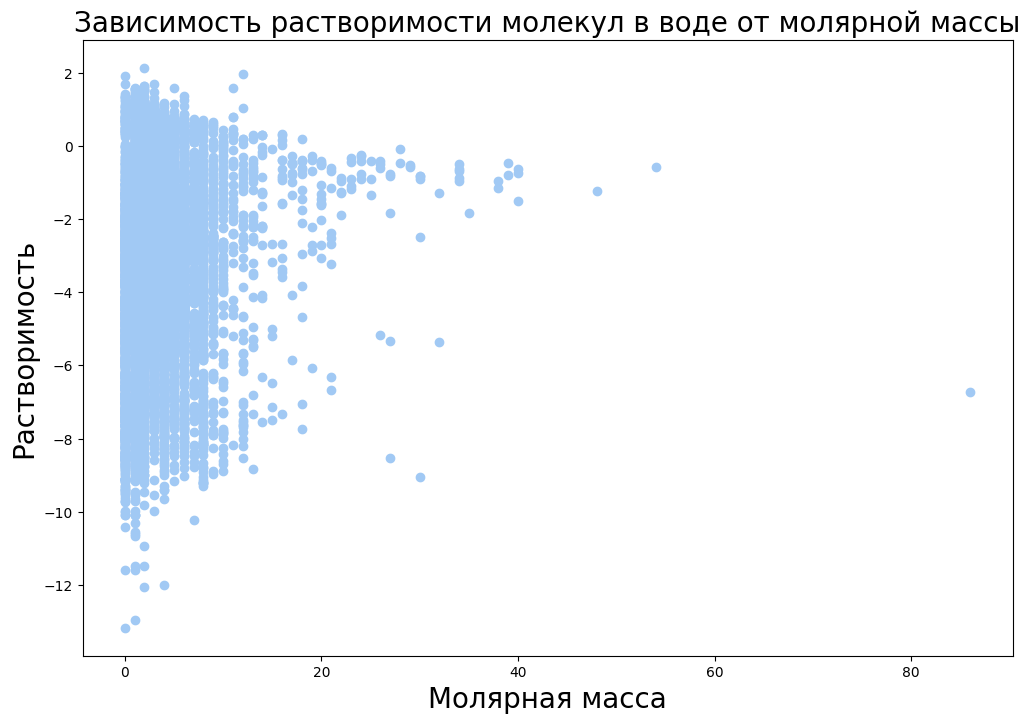

In [ ]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.scatter(df['NumHAcceptors'], df['Solubility'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость растворимости молекул в воде от молярной массы', fontsize = 20) # Создание заголовка
ax.set_xlabel('Молярная масса', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Растворимость', fontsize = 20) # Создание подписи оси y
plt.show() #Вывод графика

#### 2.3.3. Столбчатая диаграмма

Для визуализации категориальных данных часто используют такой тип графика, как столбчатая диаграмма, или **barchart**.

Для построения такой диаграммы в `matplotlib` есть функция `plt.bar`, в которую, так же, как и в функцию `plt.scatter`, нужно передать 2 массива данных:
* Во-первых, массив категорий, которые будут отображаться по оси Х
* И во-вторых, значение для каждой категории, которые будут отображать высоту каждого столбика.

Построим barchart для *Group* -  категориального признака



In [ ]:
# Сначала создадим новую таблицу, в которой сгруппируем молекулы по данному признаку и найдем среднее
df_1 = pd.DataFrame(df.groupby('Group')['Solubility'].mean())
df_1

,Solubility
Group,
G1,-2.864626
G2,-4.053215
G3,-2.793430
G4,-3.813883
G5,-2.681445


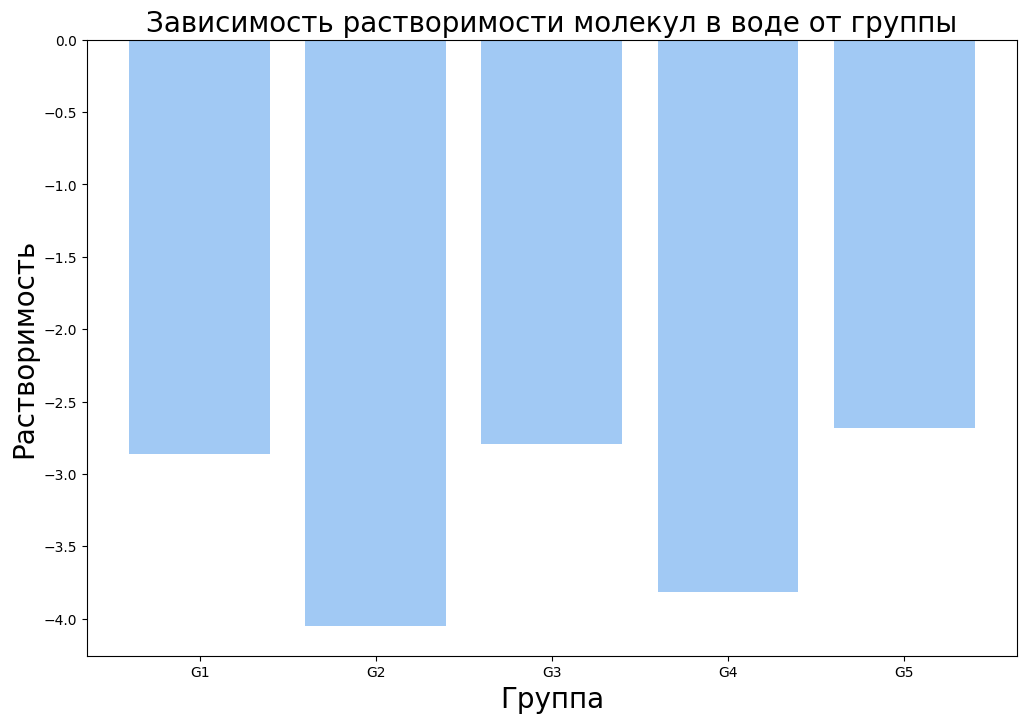

In [ ]:
# Построим стобчатую диаграмму
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.bar(df_1.index, df_1['Solubility'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость растворимости молекул в воде от группы', fontsize = 20) # Создание заголовка
ax.set_xlabel('Группа', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Растворимость', fontsize = 20) # Создание подписи оси y
plt.show() #Вывод графика

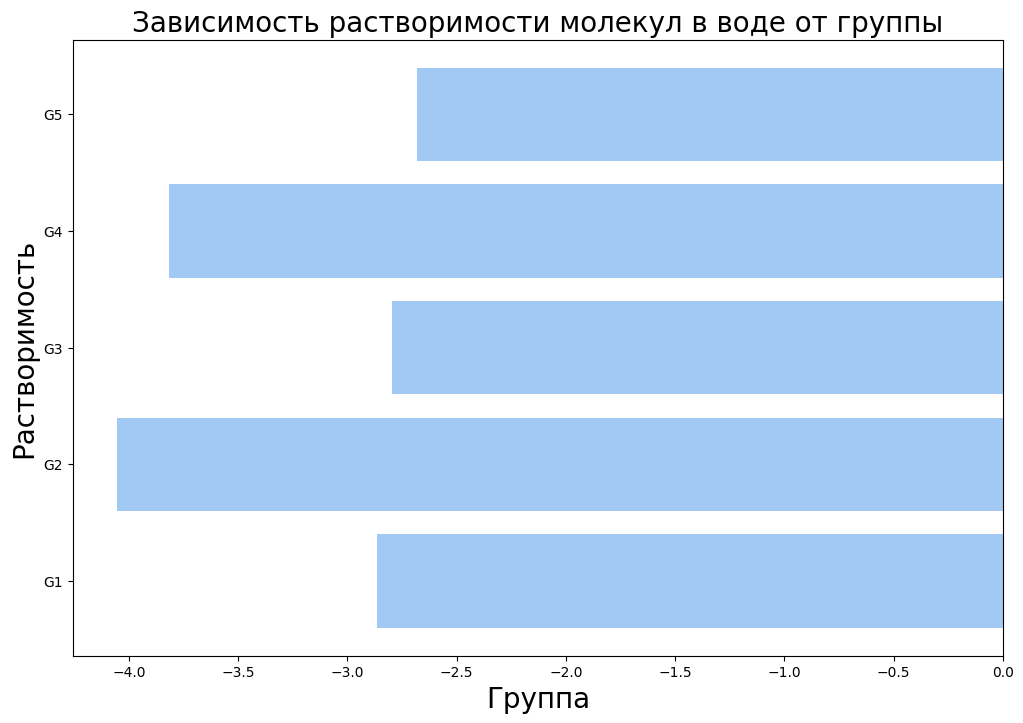

In [ ]:
# Построим стобчатую диаграмму
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.barh(df_1.index, df_1['Solubility'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость растворимости молекул в воде от группы', fontsize = 20) # Создание заголовка
ax.set_xlabel('Группа', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Растворимость', fontsize = 20) # Создание подписи оси y
plt.show() #Вывод графика

#### 2.3.4. Круговая диаграмма

Теперь давайте посмотрим на еще один тип графика, который используется для визуализации категориальных данных. Это круговая диаграмма, или **pie chart**, которая показывает, какую часть от 100% занимает та или иная категория.

Построим круговую диаграмму для различных групп молекул


In [ ]:
# Сначала создадим новую таблицу, в которой сгруппируем молекулы по данному признаку и найдем количество
df_2 = pd.DataFrame(df.groupby('Group')['Solubility'].count())
df_2

,Solubility
Group,
G1,7746
G2,235
G3,1182
G4,183
G5,636


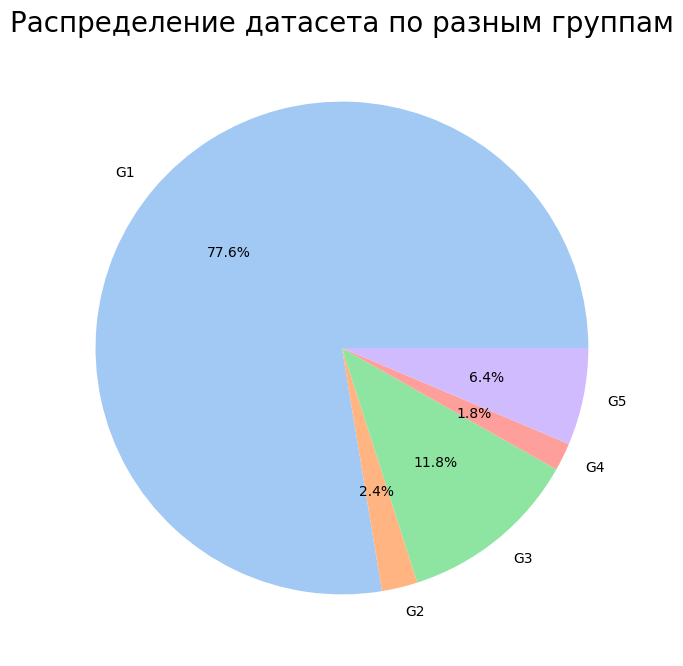

In [ ]:
# Построим стобчатую диаграмму
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости растворимости от молярной массы
ax.pie(df_2['Solubility'], labels = df_2.index, autopct = '%1.1f%%', colors = colors)
# Команда fontsize позволяет менять размер текста
ax.set_title('Распределение датасета по разным группам', fontsize = 20) # Создание заголовка
plt.show() #Вывод графика

### 2.4. Несколько графиков на одном полотне
Для того, чтобы на холст добавить несколько графиков, нужно немного изменить инициализацию графика. Функция `plt.subplots()` принимает 2 необязательных аргумента **nrows** и **ncols** - это настройка сетки графиков на холсте.  Два графика рядом друг с другом можно представить как сетку из двух столбцов и одной строки. В каждой ячейке такой сетки будет располагаться отдельный график.

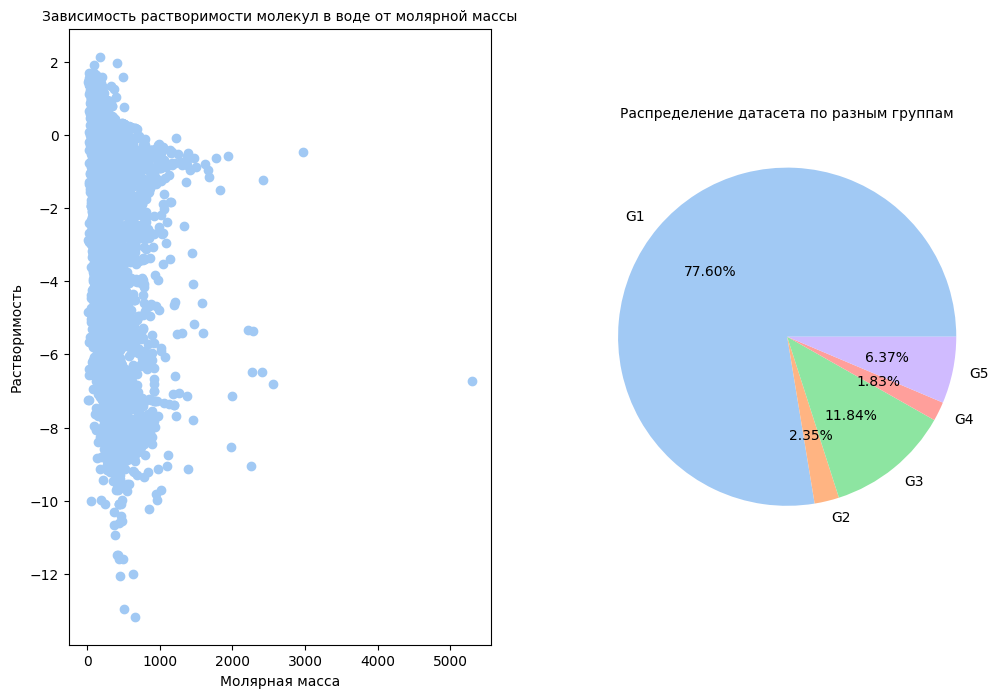

In [ ]:
# Построим стобчатую диаграмму
fig, ax = plt.subplots(figsize = (12,8), nrows = 1, ncols = 2) # Инициализация графиков и его размеров

# Отдельно для двух ячеек построим графики и все оформление для них

ax[0].scatter(df['MolWt'], df['Solubility'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax[0].set_title('Зависимость растворимости молекул в воде от молярной массы', fontsize = 10) # Создание заголовка
ax[0].set_xlabel('Молярная масса', fontsize = 10) # Создание подписи оси х
ax[0].set_ylabel('Растворимость', fontsize = 10) # Создание подписи оси y


ax[1].pie(df_2['Solubility'], labels = df_2.index, autopct = '%1.2f%%', colors = colors)
# Команда fontsize позволяет менять размер текста
ax[1].set_title('Распределение датасета по разным группам', fontsize = 10) # Создание заголовка

plt.show() #Вывод графика

## 3. Seaborn
![](https://i.imgur.com/0IsVEaI.png)

Еще одна библиотека для рисования графиков [seaborn](http://seaborn.pydata.org/index.html). В ней есть отличная интеграция с pandas. Многие типичные графики там уже реализованы, поэтому не придется их рисовать с нуля на низкоуровневом matplotlib.

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

### 3.1. Построение основных графиков в Seaborn
Построение основных графиков в matplotlib и seaborn схожи между собой, продемонстрируем основные виды графиков, которые обсуждались выше
#### 3.1.1. Линеный график
Для линейного графика используем набор данных о средних значениях растворимости в зависимости от группы

c:\Users\lera-\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Group', ylabel='Solubility'>

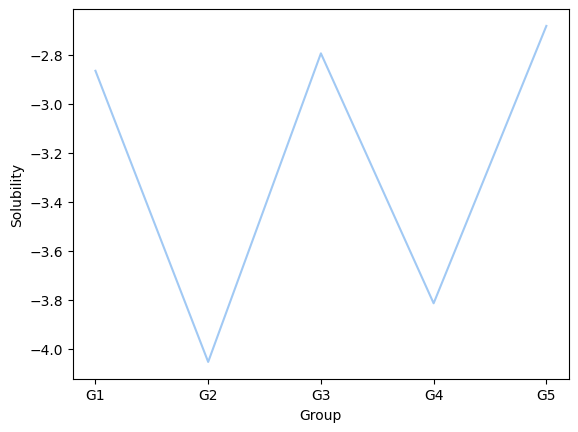

In [ ]:
sns.lineplot(df_1.index, df_1['Solubility'], color = colors[0])

#### 3.1.2. Гистограмма

<AxesSubplot:xlabel='Solubility', ylabel='Count'>

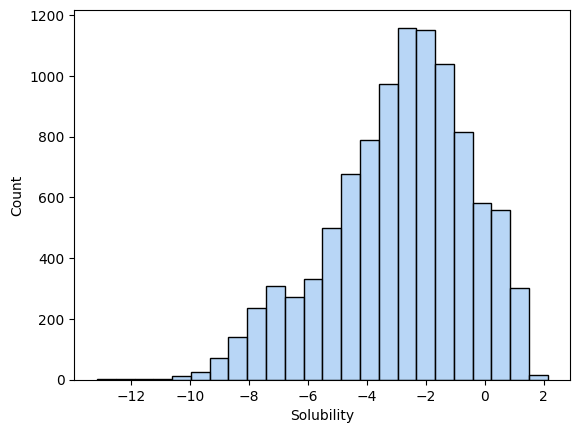

In [ ]:
# Построим гистограмму растворимости
sns.histplot(df['Solubility'], color = colors[0], bins = 24)

#### 3.1.3. Точеченая диаграмма

c:\Users\lera-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MolWt', ylabel='Solubility'>

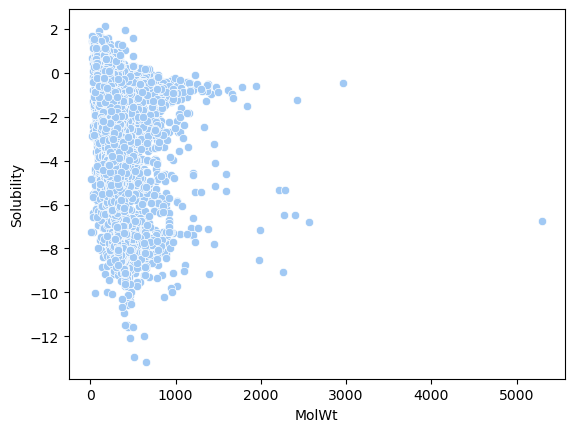

In [ ]:
# Построим точечный график зависимости растворимости от молярной массы
sns.scatterplot(df['MolWt'], df['Solubility'], color = colors[0])

#### 3.1.4. Столбчатая диаграмма

c:\Users\lera-\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, -5.0)

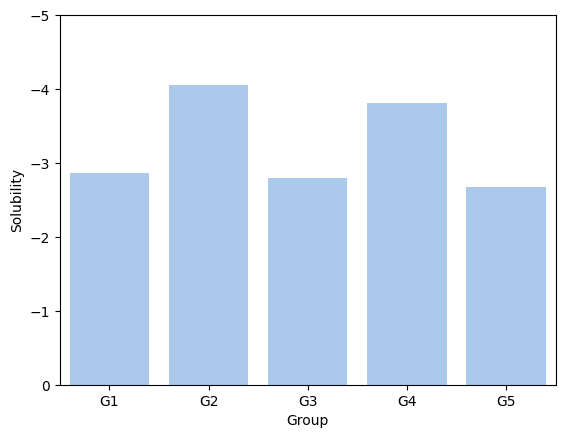

In [ ]:
sns.barplot(df_1.index, df_1['Solubility'], color = colors[0])
plt.ylim(0, -5)

## 3.2. Boxplot

Ящик с усами или диаграмма размаха - компактное отображение распределения вероятности.
Показывает медиану, нижний и верхний квантили, минимальное и максимальное значение выборки и выбросы.

Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек.

Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах.

Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

![](https://habrastorage.org/files/d0f/f53/8d5/d0ff538d59154901b18a98469de07fde.png)

Можно посмотреть на распределение только одной величины, например на растворимость, написав ее в `y`

<AxesSubplot:ylabel='Solubility'>

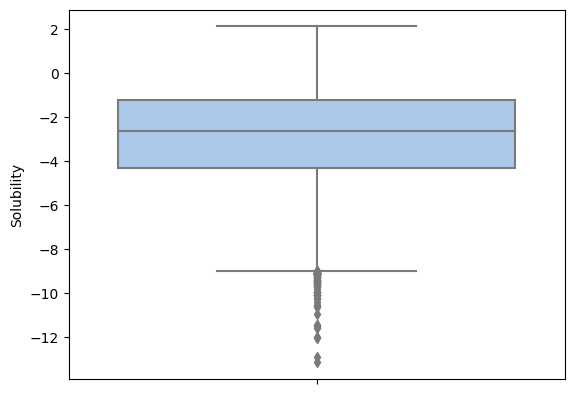

In [ ]:
sns.boxplot(y='Solubility', data=df, color=colors[0])

Можно также представить боксплоты в зависимости от другой величины, например от распределения по группам, добавив значение `x`

<AxesSubplot:xlabel='Group', ylabel='Solubility'>

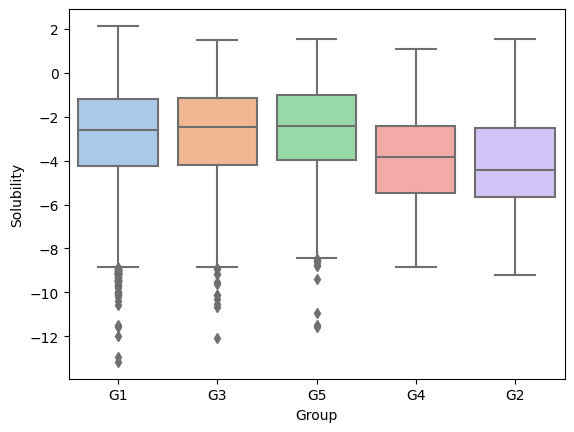

In [ ]:
sns.boxplot(x = 'Group', y='Solubility', data=df, palette = colors)

## 3.3. Violinplot

Еще один способ смотреть на два распределения сразу - это Violinplot.

Скрипичный график – это сочетание диаграммы размаха и графика плотности, развернутых и расположенных по обе стороны для отображения формы распределения данных. Толстая черная полоса в центре представляет межквартильный диапазон, исходящая из нее тонкая черная линия представляет доверительные интервалы с 95%-ной вероятностью, а белая точка – это медиана.

![image-2.png](attachment:image-2.png)

<AxesSubplot:ylabel='Solubility'>

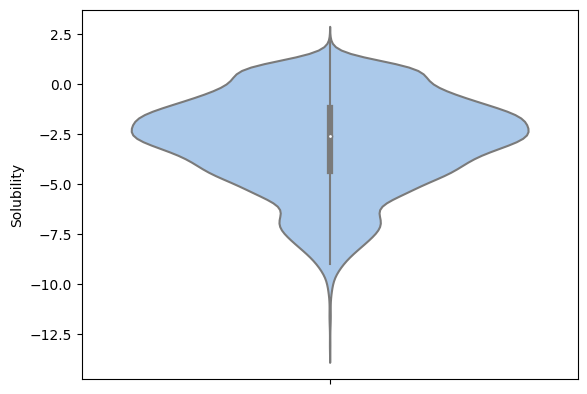

In [ ]:
sns.violinplot(y='Solubility', data=df, palette = colors)

Можно также представить violinplot в зависимости от другой величины, например от распределения по группам, добавив значение `x`

<AxesSubplot:xlabel='Group', ylabel='Solubility'>

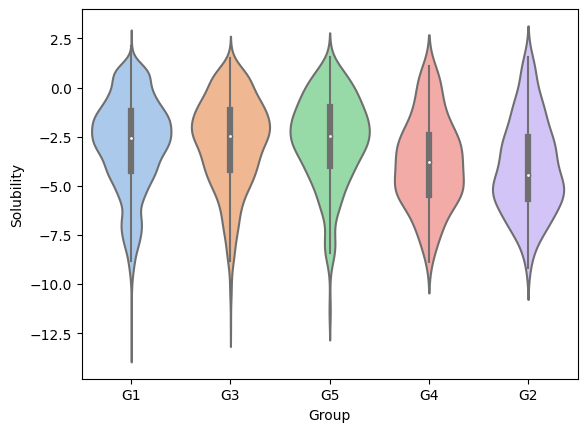

In [ ]:
sns.violinplot(x = 'Group', y='Solubility', data=df, palette = colors)

## 3.4. Heatmap
Проверка корреляций является важной частью процесса анализа поисковых данных. Этот анализ является одним из методов, используемых для определения того, какие функции больше всего влияют на целевую переменную, и, в свою очередь, используются при прогнозировании этой целевой переменной. Другими словами, это широко используемый метод выбора функций в машинном обучении.

А поскольку визуализация обычно проще к пониманию, чем табличные данные, - тепловые карты, как правило, используются для визуализации корреляционных матриц.


<AxesSubplot:>

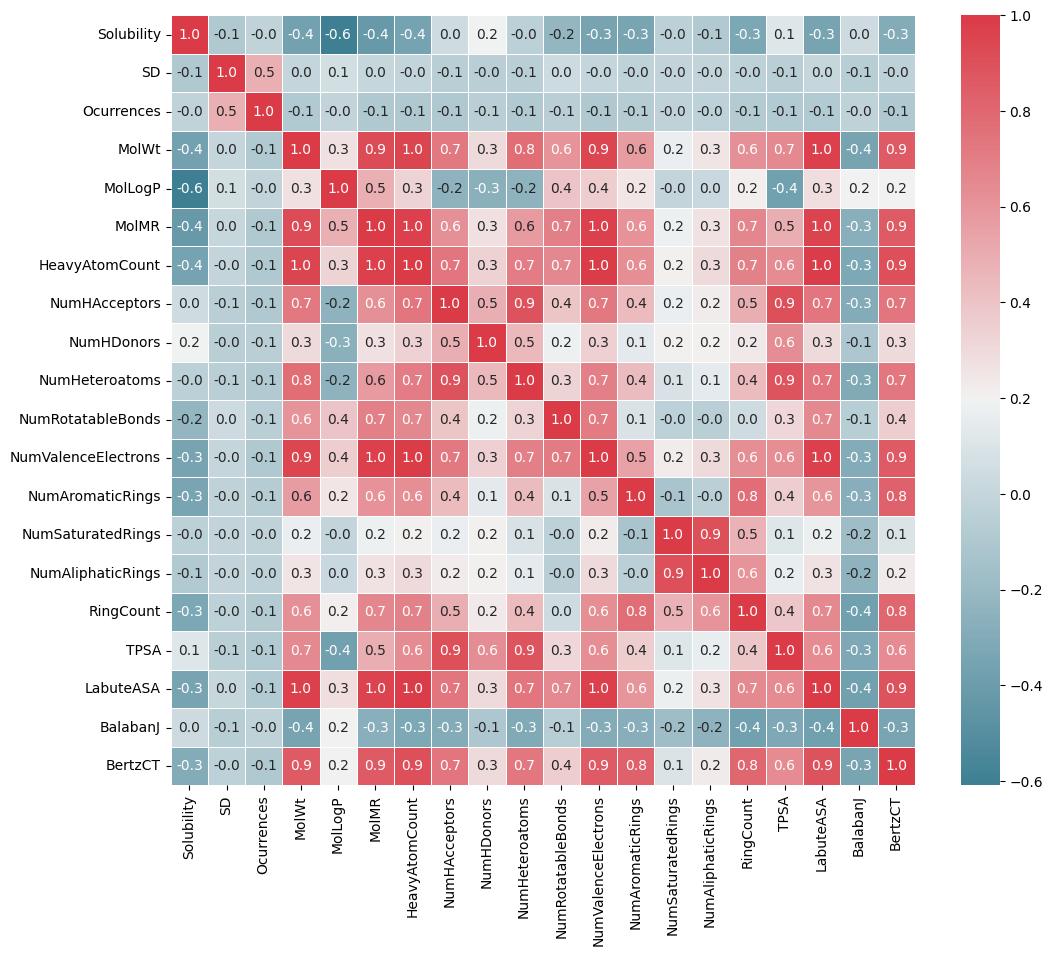

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10)) #создание графика и определение его размеров
cmap = sns.diverging_palette(220, 10, as_cmap=True) #создание палитры для корреляционного графика
sns.heatmap(corr,cmap=cmap, linewidths=.5, annot=True, fmt=".1f") # возьмем abs значение, чтобы нас не смущали отрицительные корреляции
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта

C:\Users\lera-\AppData\Local\Temp\ipykernel_23864\3152171646.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

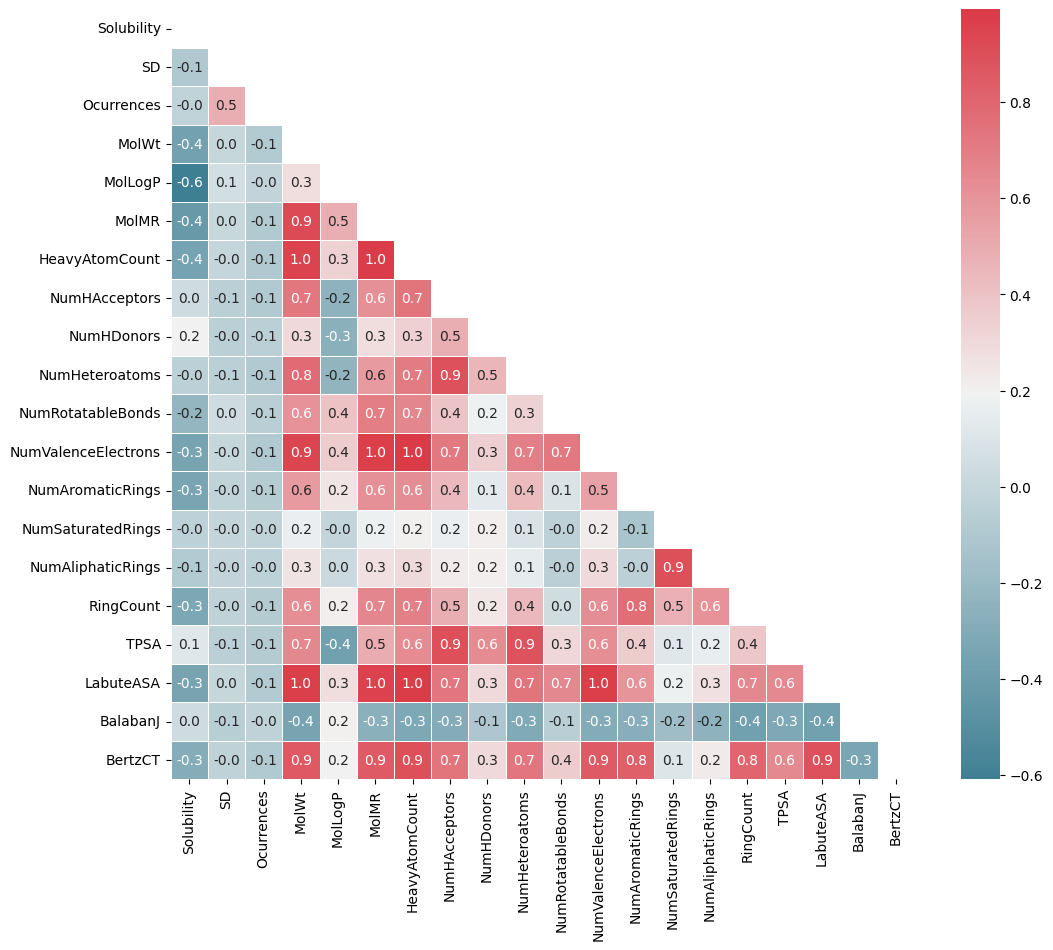

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10)) #создание графика и определение его размеров
cmap = sns.diverging_palette(220, 10, as_cmap=True) #создание палитры для корреляционного графика
sns.heatmap(corr, cmap=cmap, linewidths=.5, mask=mask, annot=True, fmt=".1f")
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта

C:\Users\lera-\AppData\Local\Temp\ipykernel_23864\2725053048.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

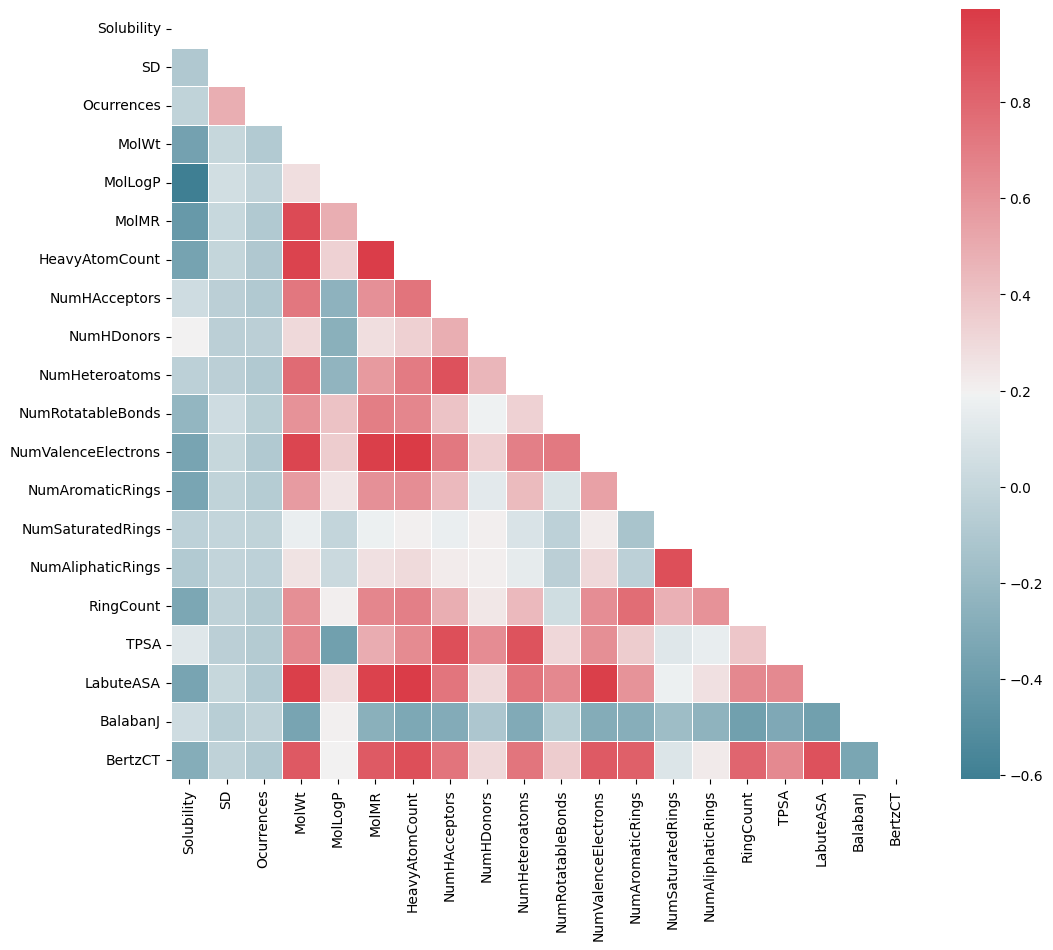

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10)) #создание графика и определение его размеров
cmap = sns.diverging_palette(220, 10, as_cmap=True) #создание палитры для корреляционного графика
sns.heatmap(corr, cmap=cmap, linewidths=.5, mask=mask, annot=False, fmt=".1f")
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта